In [1]:
from autoencodeSVJ import utils, models, trainer
import glob
import os
import numpy as np
import keras
import keras.backend as K
import matplotlib.pyplot as plt

version_id = 'v2'

Using TensorFlow backend.


### 1: load and normalize input data
we can use the data_loader for this. 
add an h5 sample, grab the table which represents it, and then split the table into training and testing datasets:

In [2]:
# get h5 datasets
repo_head = utils.get_repo_info()['head']
assert len(repo_head) > 0, "not running jupyter notebook from within a repo!! Prolly won't work :-)"
data_path = os.path.join(repo_head, "data/tightSVJ/10h5/*_data.h5")

# replace above code for 'data_path' if you want something else

data, jet_tables = utils.get_training_data_jets(data_path)

data.cdrop(["jetM", "*MET*", "*Delta*"], inplace=True)

data_loader :: Adding sample at path '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/data/tightSVJ/10h5/data_5_data.h5'
data_loader :: Grabbing dataset with keys [u'event_feature_data']
data_loader :: Adding sample at path '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/data/tightSVJ/10h5/data_4_data.h5'
data_loader :: Grabbing dataset with keys [u'event_feature_data']
data_loader :: Adding sample at path '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/data/tightSVJ/10h5/data_3_data.h5'
data_loader :: Grabbing dataset with keys [u'event_feature_data']
data_loader :: Adding sample at path '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/data/tightSVJ/10h5/data_0_data.h5'
data_loader :: Grabbing dataset with keys [u'event_feature_data']
data_loader :: Adding sample at path '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/data/tightSVJ/10h5/data_2_data.h5'
data_loader

,jetEta,jetPhi,jetPt,jetChargedFraction,jetPTD,jetAxis2,jetFlavor,jetEnergy
0,0.292314,-1.215342,811.505066,0.617647,0.292997,0.015287,1.0,847.437136
1,-1.108254,0.154565,792.122620,0.600000,0.234078,0.025373,3.0,1331.724071
2,0.131421,-2.197223,665.996277,0.526316,0.198135,0.021002,3.0,674.659860
3,-1.134106,1.502835,942.049133,0.619048,0.277420,0.018531,2.0,1616.606413
4,-0.058697,2.968807,753.037720,0.500000,0.407907,0.027717,2.0,756.594176
5,-0.116076,-1.582877,1224.752563,0.575758,0.193657,0.020776,4.0,1240.268663
6,-0.522428,-1.064521,1240.000854,0.672414,0.214055,0.022217,1.0,1415.601506
7,0.479513,2.142449,1163.479126,0.550000,0.283502,0.020701,3.0,1313.717833
8,0.785336,1.244235,713.023560,0.421053,0.222477,0.100818,2.0,946.259955
9,-0.561334,-1.531905,962.493652,0.378378,0.392954,0.022140,1.0,1119.513002


In [3]:
tagged, tag_index = utils.split_table_by_column(
    "jetFlavor",
    data,
    utils.delphes_jet_tags_dict,
    False
)
sizes = map(lambda x: x.shape[0], tagged)
for t,s in zip(tagged, sizes):
    print  "{} jet: {}, {}%".format(t.name, s, round(100.*s/sum(sizes), 1))

down jet: 18999, 18.4%
up jet: 38841, 37.6%
strange jet: 25377, 24.5%
charm jet: 9577, 9.3%
bottom jet: 3341, 3.2%
gluon jet: 7281, 7.0%


#### plotting
we'll also plot the input histograms here, to make sure there are no screaming discrepancies in the training and testing sets

down:
	18.4% (14258) train
	18.3% (4741) test
	18.4% (18999) original
up:
	37.5% (29116) train
	37.6% (9725) test
	37.6% (38841) original
strange:
	24.5% (19029) train
	24.6% (6348) test
	24.5% (25377) original
charm:
	9.2% (7164) train
	9.3% (2413) test
	9.3% (9577) original
bottom:
	3.3% (2525) train
	3.2% (816) test
	3.2% (3341) original
gluon:
	7.1% (5470) train
	7.0% (1811) test
	7.0% (7281) original
data_table :: plotting distrubution(s) for table(s) ['train_down', 'test_down', 'down']


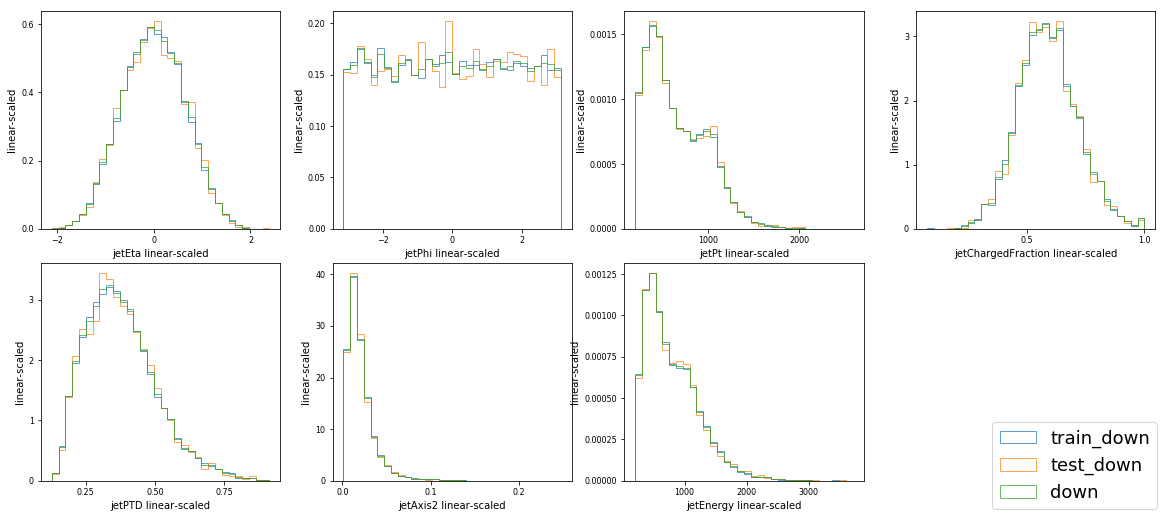

data_table :: plotting distrubution(s) for table(s) ['train_up', 'test_up', 'up']


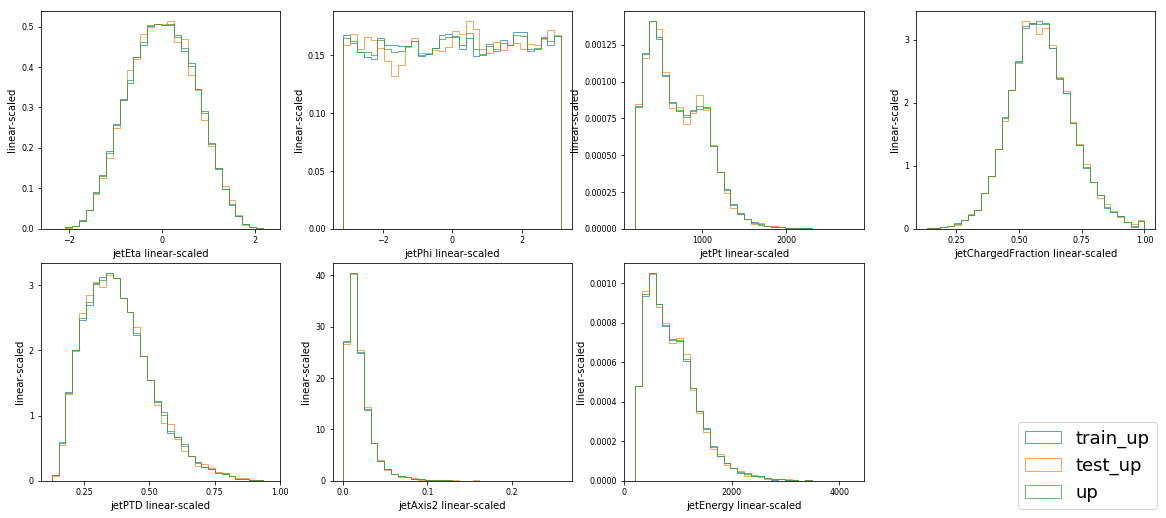

data_table :: plotting distrubution(s) for table(s) ['train_strange', 'test_strange', 'strange']


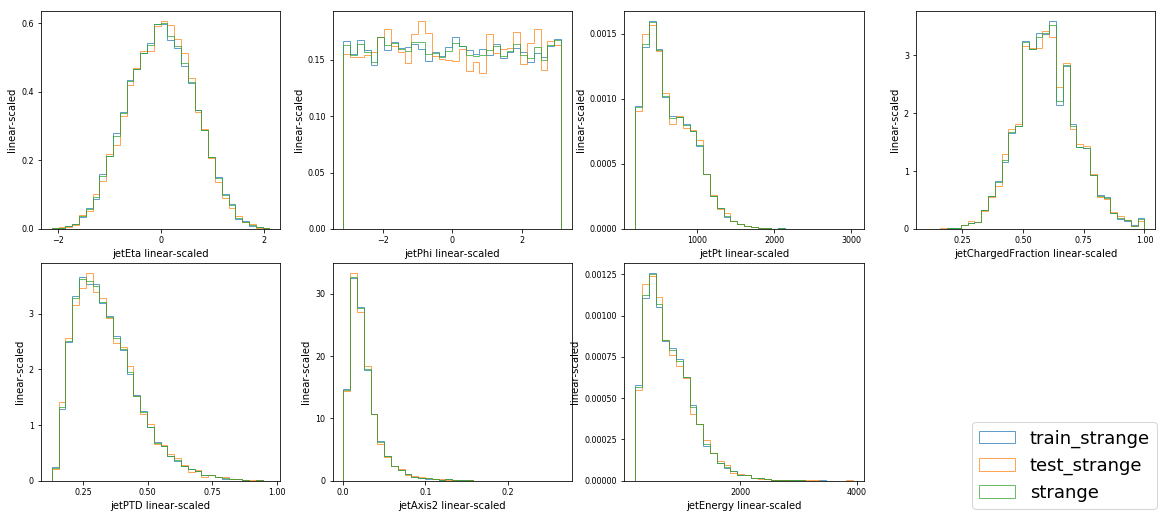

data_table :: plotting distrubution(s) for table(s) ['train_charm', 'test_charm', 'charm']


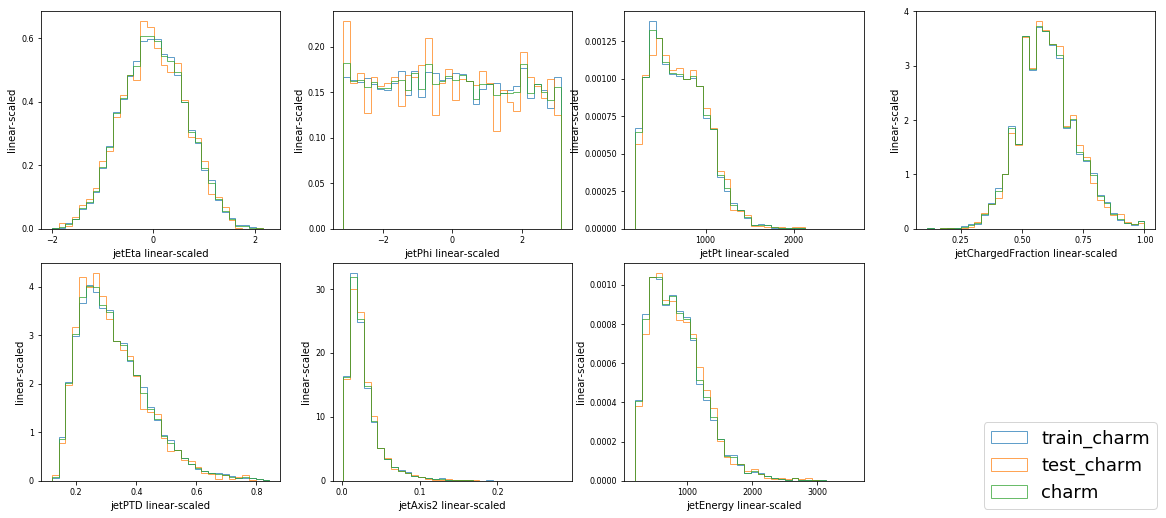

data_table :: plotting distrubution(s) for table(s) ['train_bottom', 'test_bottom', 'bottom']


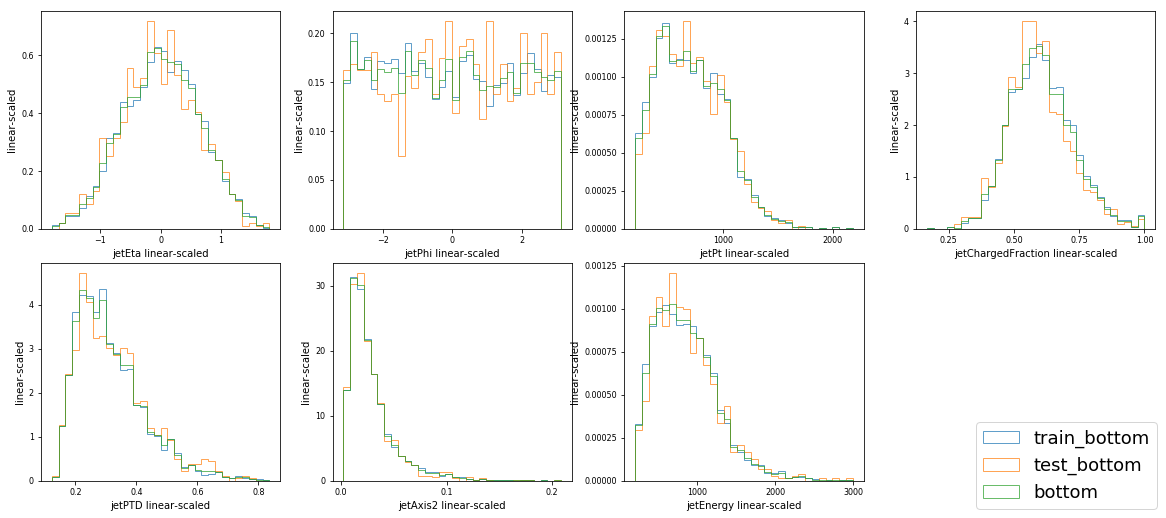

data_table :: plotting distrubution(s) for table(s) ['train_gluon', 'test_gluon', 'gluon']


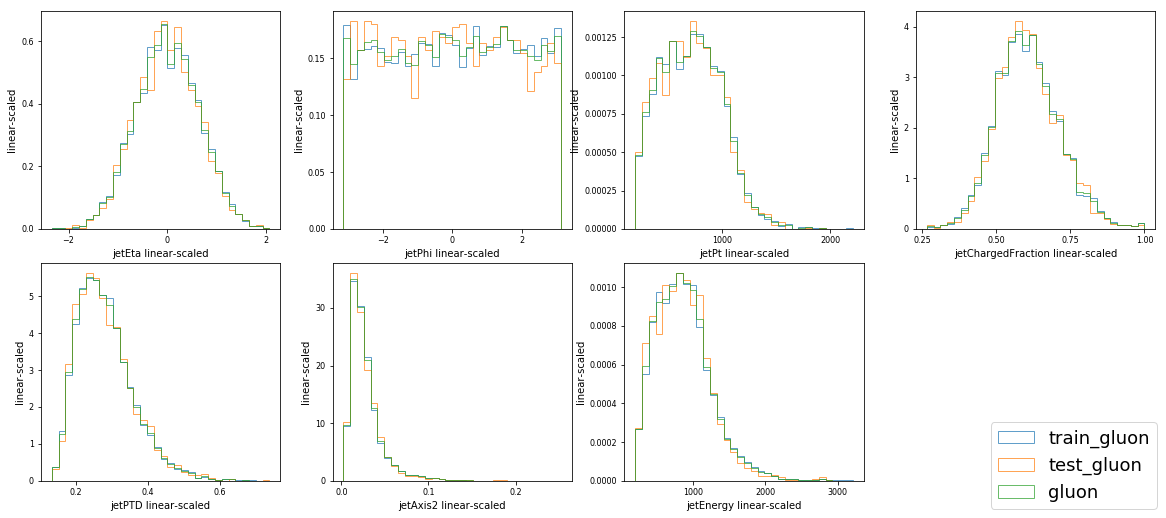

In [4]:
split = 0.25

train, test = data.train_test_split(split)

train_tags, test_tags = map(
    lambda x: utils.split_table_by_column(
        "jetFlavor", x,
        utils.delphes_jet_tags_dict, False
    )[0],
    [train, test]
)

for trt, tet in zip(train_tags, test_tags):
    print "{}:".format(trt.name)
    print "\t{:.1f}% ({}) train".format(100.*trt.shape[0]/train.shape[0], trt.shape[0])
    print "\t{:.1f}% ({}) test".format(100.*tet.shape[0]/test.shape[0], tet.shape[0])
    print "\t{:.1f}% ({}) original".format(100.*(tet.shape[0] + trt.shape[0])/data.shape[0], trt.shape[0] + tet.shape[0])

for full, trt, tet in zip(tagged, train_tags, test_tags):
    trt.name = "train_" + trt.name
    tet.name = "test_" + tet.name
    trt.plot([tet, full], normed=1)

# data.plot([train, test], normed=1, bins=32, figsize=(30,15), fontsize=25, cols=4, alpha=1)
# data.plot(jet_tables, normed=1, bins=32, figsize=(30,15), fontsize=25, cols=4, alpha=1)

data_table :: plotting distrubution(s) for table(s) ['down', 'up', 'strange', 'charm', 'bottom', 'gluon']


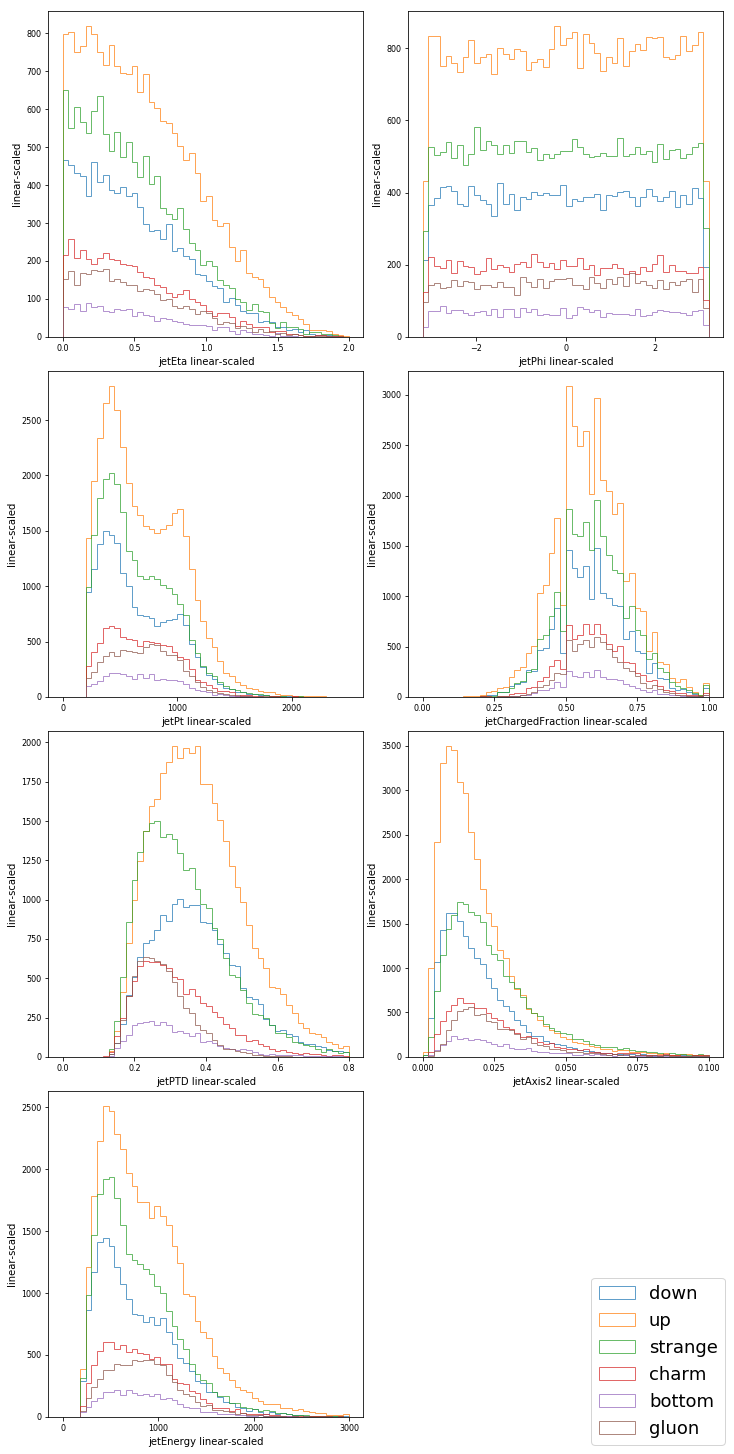

In [5]:
tagged[0].plot(tagged[1:], normed=0, bins=50, cols=2, figsize=(10,20), rng=(
        (0,2), (-3.2, 3.2), (0,2500), (0,1), (0, 0.8),(0,.1), (0,3000)))

We then get training/testing datasets, and normalize them to the main data set. We can check how the normalized features look compared with one another, to make sure that they are useful. This way we can decide what type of normalization to use.

data_table :: plotting distrubution(s) for table(s) ['jetEta', 'jetPhi', 'jetPt', 'jetChargedFraction', 'jetPTD', 'jetAxis2', 'jetEnergy']


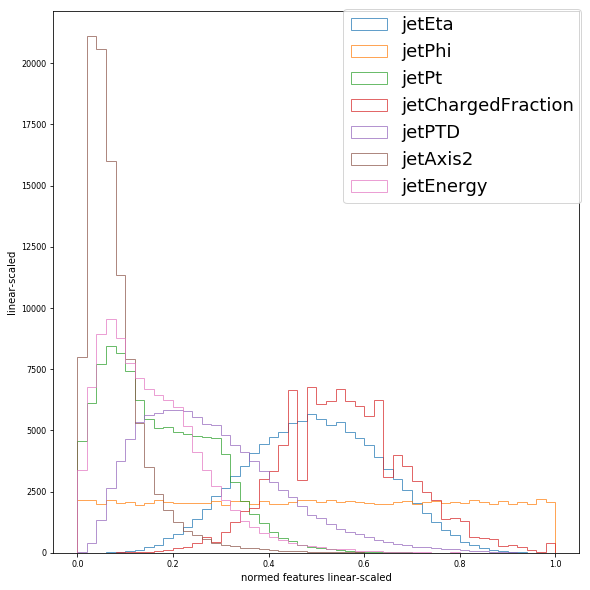

NameError: name 'train_raw' is not defined

In [6]:
raw = data.cdrop("*Flavor")

norm_args = {
    "norm_type": "MinMaxScaler",
#     "feature_range": (0.01, 0.99)
}

norm = raw.norm(**norm_args)
features = [utils.data_table(norm[c].values.reshape(norm[c].shape[0],1), name=c, headers=["normed features"]) for c in norm]
features[0].plot(features[1:], bins=50, figsize=(8,8), fontsize=10, figloc="upper right")

train_raw.cdrop("*Flavor", inplace=True)
test.cdrop("*Flavor", inplace=True)
train_norm, test_norm = train.norm(**norm_args), train.norm(test, **norm_args)


# rmin, rmax = np.asarray([(data.median() - 2.*data.std()).values, (data.median() + 2.*data.std()).values])
# custom_norm = lambda x: (x - rmin) / (rmax - rmin)
# # norm_data = data.norm(norm_type=0, rng=rng)
# norm_data = custom_norm(data)
# features = [utils.data_table(norm_data[c].values.reshape(norm_data[c].shape[0],1), name=c, headers=["normed features"]) for c in norm_data]
# features[0].plot(features[1:], bins=50, figsize=(8,8), fontsize=10)

we will use `RobustScaler`, because the results look the best (and train the best ;-))

### 2. build model 
To make our model, we'll use the simple "shallow" architecture defined in models.py. This gives us a decidedly shallow autoencoder with a bottleneck of our liking.

In [128]:
ae_skeleton = models.base_autoencoder()
ae_skeleton.add(7)
ae_skeleton.add(6)
ae_skeleton.add(4, 'relu')
ae_skeleton.add(6)
ae_skeleton.add(7, "linear")
autoencoder = ae_skeleton.build()
encoder, decoder = autoencoder.layers[1:]
name = "bn_4_{0}".format(version_id)
path = "autoencode/data/training_runs/7jf/custom"
instance = trainer.trainer(os.path.join(os.path.join(repo_head, path), name))

h5_elt 'metric_names' :: creating group 'data' in file 'bn_4_v2.h5'
h5_elt 'metric_names' :: creating dataset 'data/metric_names' in file 'bn_4_v2.h5'
h5_elt 'training' :: creating group 'params' in file 'bn_4_v2.h5'
h5_elt 'training' :: creating dataset 'params/training' in file 'bn_4_v2.h5'
h5_elt 'config' :: creating dataset 'params/config' in file 'bn_4_v2.h5'


... and the model summaries:

In [129]:
print('encoder summary:')
encoder.summary()
print('\n')
print('decoder summary:')
decoder.summary()
print('\n')
print('autoencoder summary:')
autoencoder.summary()


encoder summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (InputLayer)         (None, 7)                 0         
_________________________________________________________________
layer_2 (Dense)              (None, 6)                 48        
_________________________________________________________________
layer_3 (Dense)              (None, 4)                 28        
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


decoder summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_3 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
layer_4 (Dense)              (None, 6)                 30        
____________________________________________

### 3. train model 
this can be most easily done using the `training_skeleton`, defined in `skeletons.py`. This helps with dynamic training and allows for stopping midway without losing history information, retraining models, etc.

In [130]:
# name = "medium_4_test"
# instance = trainer.trainer(os.path.join("../data/training_runs/7jf/mean_std_norm/", name))

training is easy:

In [151]:
from keras import backend as K

def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return ( 1 - SS_res/(SS_tot + K.epsilon()))

def r_square_loss(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred), axis=-1)
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)), axis=-1)
    return SS_res/SS_tot

# train, test = data.train_test_split(0.25)
# ntype="RobustScaler"
# train_norm, test_norm = data.norm(train, norm_type=ntype), data.norm(test, norm_type=ntype)

autoencoder = instance.train(
    x_train=train_norm.data,
    x_test=test_norm.data,
    y_train=train_norm.data,
    y_test=test_norm.data,
    optimizer="adam",
    loss=r_square_loss,
    epochs=10,
    model=autoencoder,
    metrics=[r_square, "mae", "mse"],
    force=False,
    batch_size=1028,
    use_callbacks=True,
    learning_rate=0.001
)

SyntaxError: can't assign to function call (<ipython-input-151-816c67565d51>, line 9)

### 4. check results
it is easy to check things like loss, accuracy, etc. later on with this method - all data is saved to an h5 file unique to that training name.

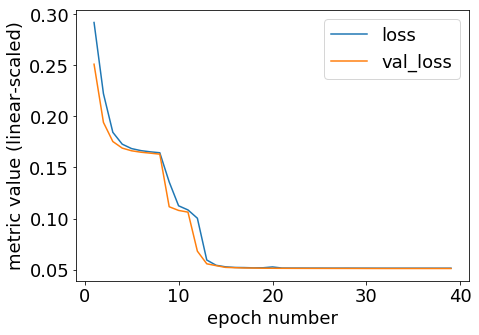

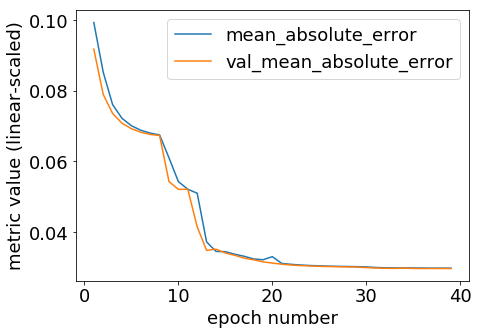

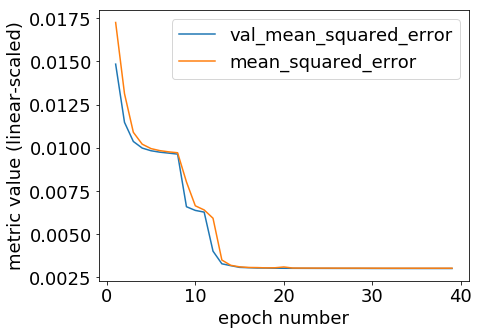

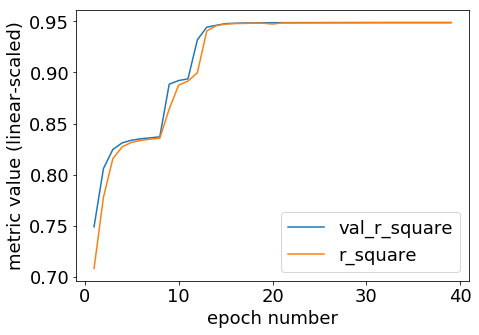

In [147]:
instance.plot_metrics(fnmatch_criteria="*loss*", yscale="linear")
instance.plot_metrics(fnmatch_criteria="*absolute*", yscale="linear")
instance.plot_metrics(fnmatch_criteria="*squared*", yscale="linear")
instance.plot_metrics(fnmatch_criteria="*r_square*", yscale="linear")

checking results:

data_table :: plotting distrubution(s) for table(s) ['train reconstructed', "'train' normed to 'train'"]


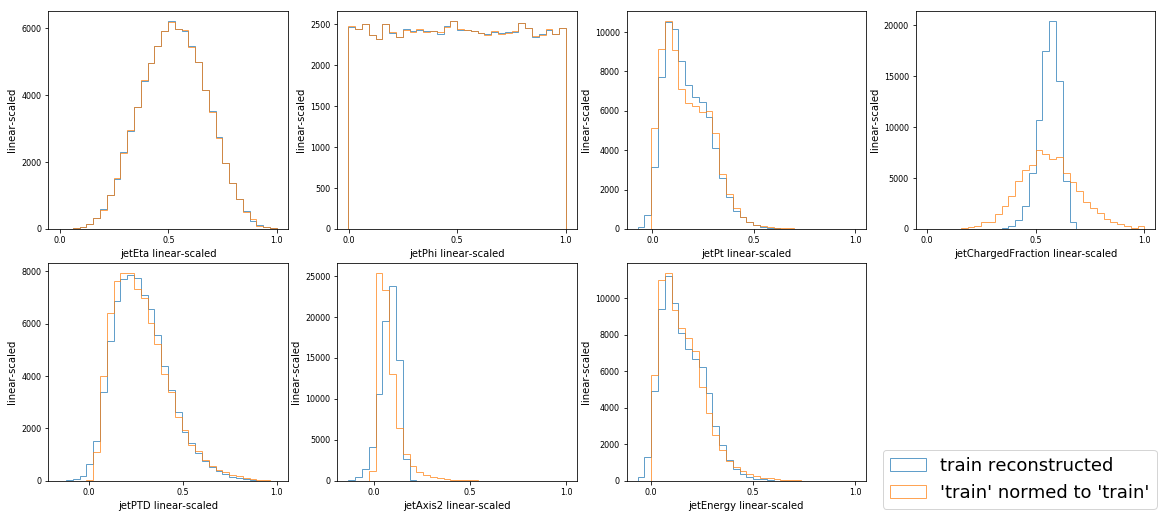

In [148]:

# data_recon_norm = utils.data_table(autoencoder.predict(.norm(**norm_args).df.values), headers=train_norm.headers)
# data_recon = data.inorm(data_recon_norm, **norm_args)
# data_recon.name = "all jet data (pred)"

train_reconstructed_norm = utils.data_table(autoencoder.predict(train_norm.data), headers=train_norm.headers)
test_reconstructed_norm = utils.data_table(autoencoder.predict(test_norm.data), headers=test_norm.headers)
train_reconstructed_norm.name = "train reconstructed"
# train_reconstructed_norm.plot([train_norm], values='jetAxis2', bins=70, rng=(0,0.5))
train_reconstructed_norm.plot([train_norm])
# test_reconstructed_norm.name = "test reconstructed"
# test_reconstructed_norm.plot([test_norm])
# train_reconstructed = data.inorm(train_reconstructed_norm)
# # test_reconstructed = data.inorm(test_reconstructed_norm)


# test_reconstructed.name = "test reconstructed"

# train.plot([train_reconstructed], bins = 30, alpha=1.0)
# test.plot([test_reconstructed], bins=30, alpha=1.0)
# data.plot(
# #     [train_reconstructed, test_reconstructed],
#     data_recon,
#     normed=0, bins=50, alpha=1.0, figloc="upper right",
#     figsize=(25,15), fontsize=22, rng=[(-2,2), (-4,4), (0,2000), (0,210), (0,1), (0,0.8), (0, .10)]
# )

# data.norm(**norm_args).plot(
#     data_recon_norm,
#     normed=0, bins=50, alpha=1.0, figloc="upper right",
#     figsize=(25,15), fontsize=22
# )

In [149]:
encoder, decoder = autoencoder.layers[1:]
train_reps, test_reps = (
    utils.data_table(encoder.predict(train_norm.data), name="train_reps"),
    utils.data_table(encoder.predict(test_norm.data), name="test_reps")
)

data_table :: plotting distrubution(s) for table(s) ['train_reps', 'test_reps']


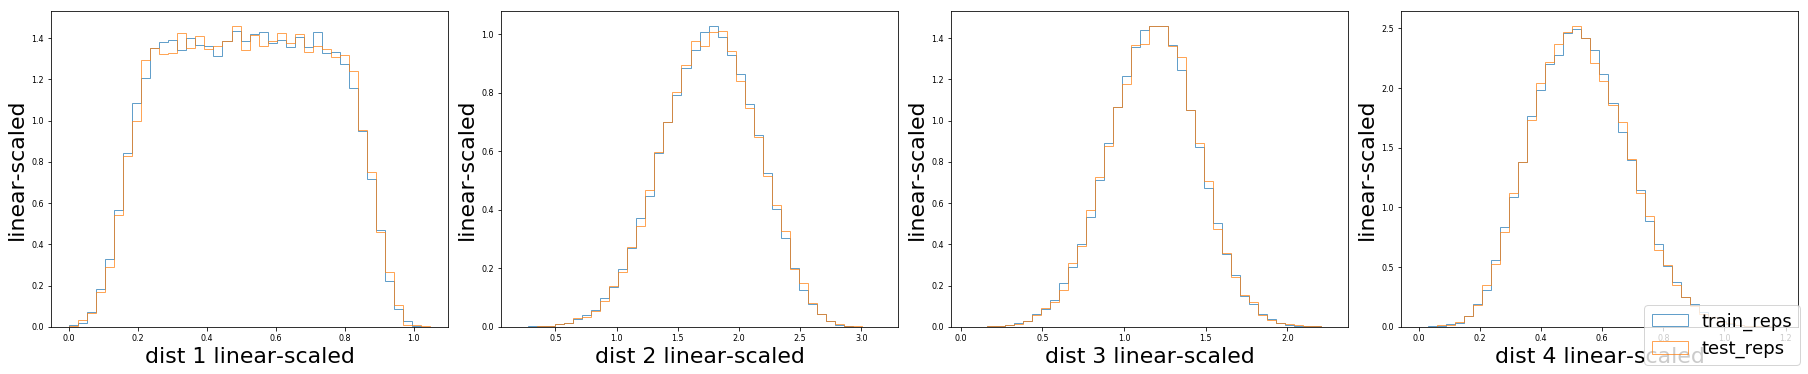

In [150]:
train_reps.plot([test_reps], cols=5, figsize=(25,5), fontsize=22, normed=1, bins=40)